# Assignment 6. Correlation Coefficient

1. Find two features in your dataset with more or less “linear-like” scatterplot.
2. Display the scatter-plot and comment how well it is suitable for building a linear regression.
3. Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.
4. Find the correlation and determinacy coefficients, and comment on the meaning of the latter.
Make a prediction of the target values for given two or three predictor’ values; make a comment
Compare the mean relative absolute error of the regression on all points of your set and the determinacy coefficient and make comments

In [54]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
sns.set()

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# Load data
hero_agg = pd.read_csv('aggregated_superheroes.csv',sep=';')

# Check NaN values
print("NaN:", hero_agg.isna().values.any()) 
# Check duplicates in names
print("Duplicates:", hero_agg.name.duplicated().any()) 
hero_agg = hero_agg.set_index('name')
hero_agg.head()

NaN: False
Duplicates: False


,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Dexterity & speed,Healing,Weapon abilities,Brainpower,Energy powers,Sences & Thermal abilities,Psychic abilities,Body features,Space abilities,Defensive abilities,Similiar to magic,God-like abilities
name,,,,,,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,1,2,0,0,0,0,0,3,0,1,0,0
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,3,2,2,1,0,2,1,5,0,0,0,0
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,0,0,0,0,1,0,0,0,0,0,0,0
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,2,2,0,1,0,0,0,2,0,0,1,0
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,0,1,0,0,1,2,0,2,0,3,2,0


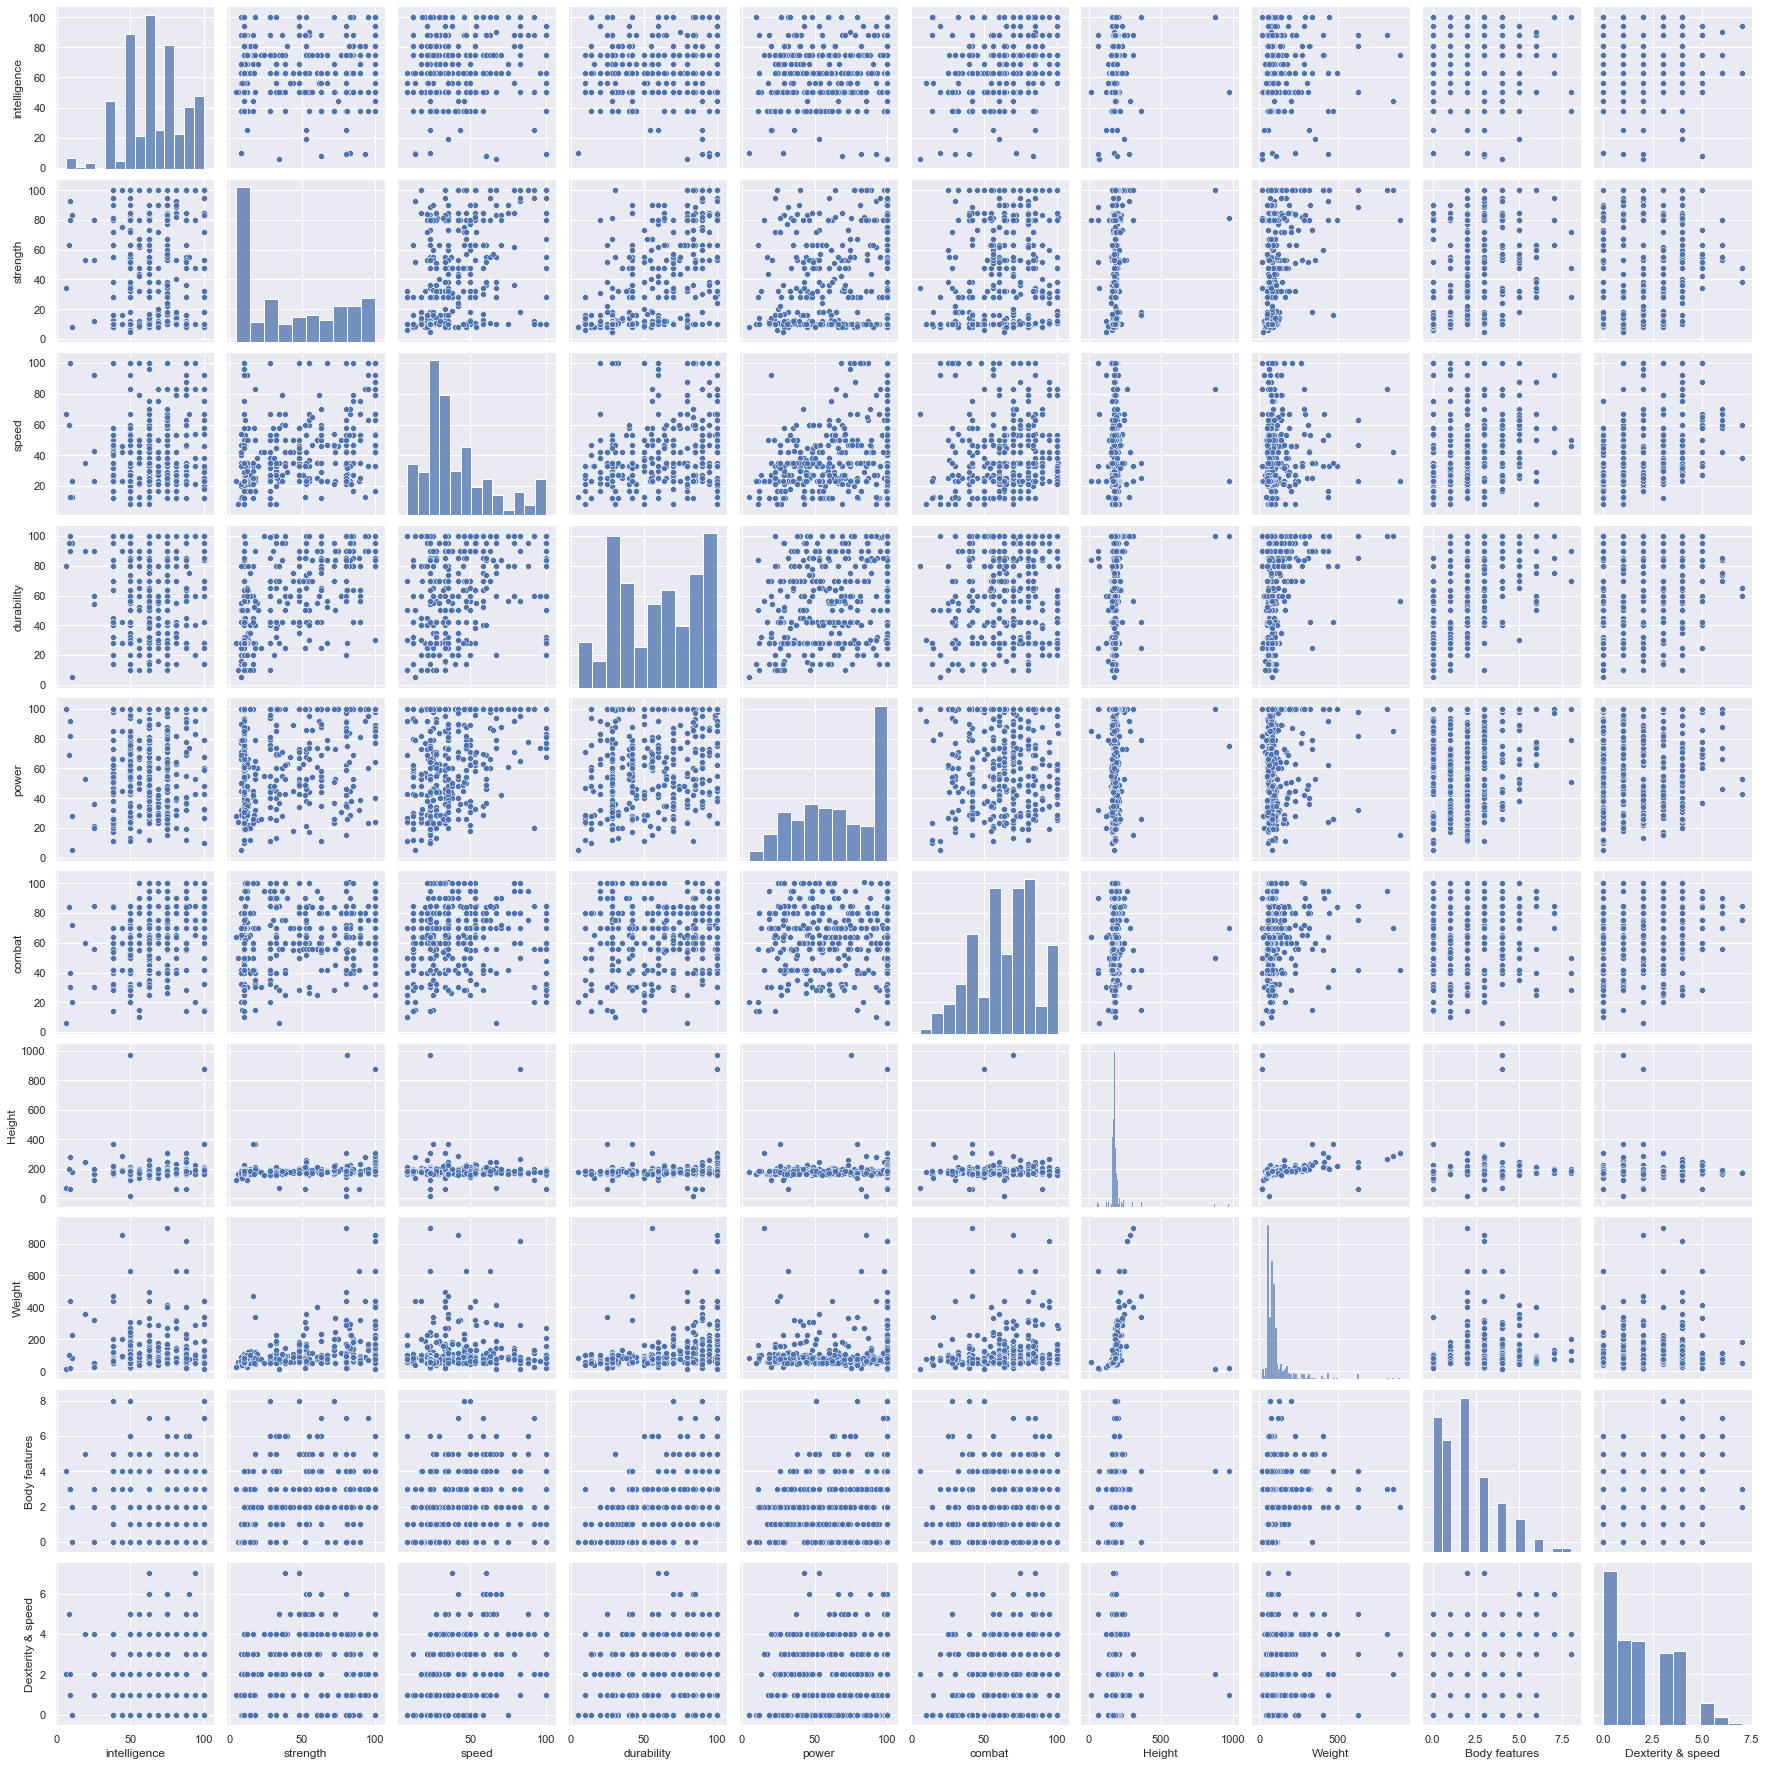

In [29]:
# Plot plots of several numerical features
subset_features = ['intelligence','strength','speed','durability','power','combat', 'Height','Weight','Body features','Dexterity & speed']
sns.pairplot(hero_agg.loc[:,subset_features])
plt.savefig('scatterplots.png')

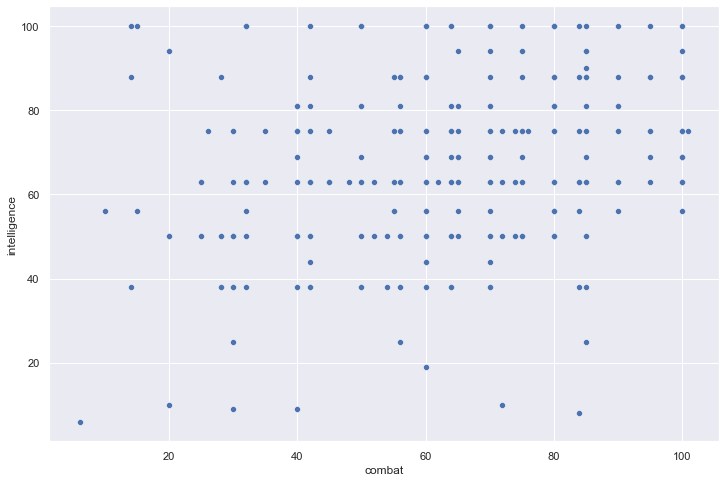

In [81]:
# Plot scatterplot for combat and intelligence
sns.scatterplot(x='combat', y='intelligence', data=hero_agg)
plt.savefig('combat_int.png')

In [124]:
# Find coefficients of linear regression model
y = hero_agg.intelligence
x = hero_agg.combat

coef = sum((y-y.mean())*x)/sum((x-x.mean())*x)
intercept = y.mean()-coef*x.mean()
print(coef,intercept)

0.26725254330367554 48.193406060430334


In [93]:
# Train linear regression model - can see the same parameters
linreg = LinearRegression()
linreg.fit(hero_agg[['combat']], hero_agg.intelligence)
print(linreg.coef_, linreg.intercept_)

[0.26725254] 48.19340606043032


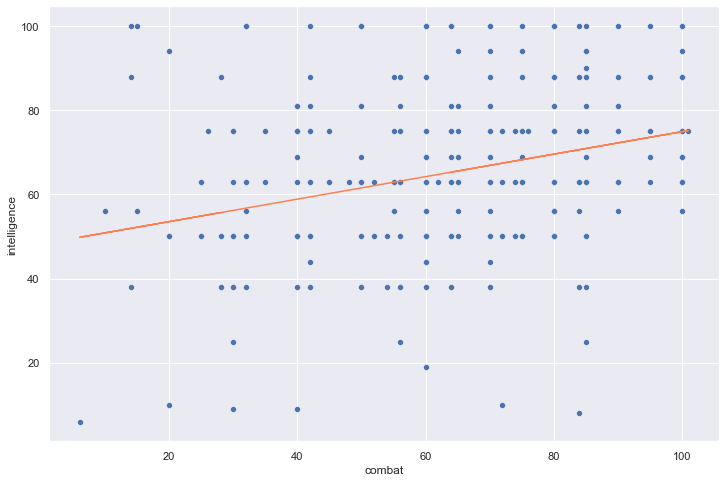

In [129]:
# Plot line from model and original data
sns.scatterplot(x='combat', y='intelligence', data=hero_agg)
plt.plot(x,coef*x+intercept,color='coral')
plt.savefig('combat_int_reg.png')

In [130]:
# Coefficient of determintaion and correlation
r = sum((y-y.mean())*(x-x.mean()))/len(x)/x.std()/y.std()
print(r, r**2)

0.29853467371772563 0.0891229514117489


In [147]:
# Generate 2 samples
x_small = x.sample(2)
pd.concat({'Combat': x_small, 'Predicted intelligence': x_small*coef+intercept, 'True intelligence:':y[x_small.index]})

                        name    
Combat                  Deadpool    100.000000
                        Snowbird     52.000000
Predicted intelligence  Deadpool     74.918660
                        Snowbird     62.090538
True intelligence:      Deadpool     69.000000
                        Snowbird     50.000000
dtype: float64

In [158]:
#MRAE
print(sum(abs(y - x*coef-intercept)/y)/len(x)*100)

32.291338026934746
